[View in Colaboratory](https://colab.research.google.com/github/NikhilKorati/Cuisine-Prediction/blob/master/Copy_of_Cuisine_Prediction.ipynb)

#Cluster Cuisines and Predict Cuisine Type

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
!wget https://www.dropbox.com/s/v3hvge1q9rnnuzl/recipes.csv
    
cuisine_df = pd.read_csv('recipes.csv')

--2018-06-05 00:13:15--  https://www.dropbox.com/s/v3hvge1q9rnnuzl/recipes.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/FfhQX0uQ71FuwRTLrUaVOKfIOYvRVnUFffUJ62e0Uu91Au3LBJ1ukGZ3Rg9k3vE5/file [following]
--2018-06-05 00:13:17--  https://dl.dropboxusercontent.com/content_link/FfhQX0uQ71FuwRTLrUaVOKfIOYvRVnUFffUJ62e0Uu91Au3LBJ1ukGZ3Rg9k3vE5/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.9.6, 2620:100:6031:6::a27d:5106
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.9.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67284474 (64M) [text/csv]
Saving to: ‘recipes.csv’

recipes.csv         100%[===================>]  64.17M  63.4MB/s    in 1.0s    

2018-06-05 00:13:18 (63.4 MB

In [10]:
print('No of observations: %d \nNo of features: %s' % (cuisine_df.shape[0], cuisine_df.shape[1]))

No of observations: 57691 
No of features: 384


In [12]:
cuisine_df.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [13]:
cuisine_df.tail()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
57686,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57687,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57688,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57689,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57690,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [15]:
cuisine_df.describe()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
count,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,...,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691
unique,69,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,American,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
freq,40150,55362,57690,57467,57604,55258,57654,57065,57680,57678,...,57542,57319,55479,56957,56665,57658,57605,54289,56634,56584


# Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


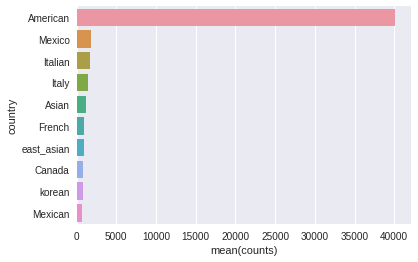

In [35]:
top_10_country = pd.DataFrame(cuisine_df['country'].value_counts()[:10].rename_axis('country').reset_index(name='counts'))
sns.barplot(y='country', x='counts', data=top_10_country)
plt.show()

In [67]:
!pip install wordcloud

    100% |████████████████████████████████| 174kB 4.1MB/s 
  Running setup.py bdist_wheel for wordcloud ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/3e/40/7c/d768cb5022ec6aa5611728339886bc1e9f0b629547f39237fd
Successfully built wordcloud


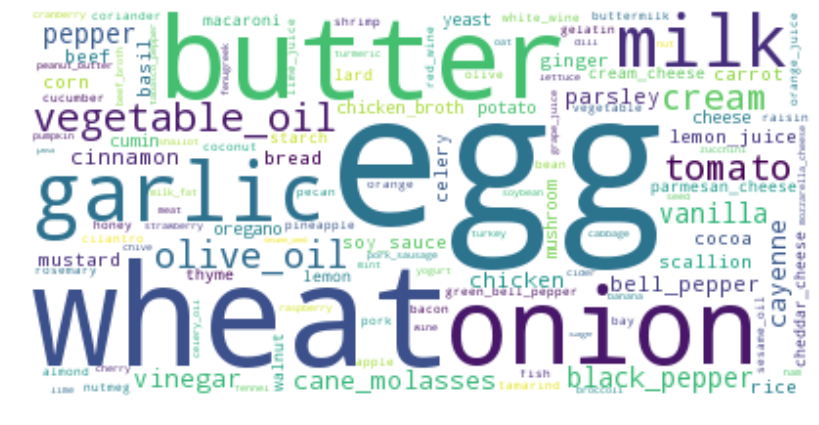

In [87]:
ingredients_count = pd.DataFrame((cuisine_process_df == 'Yes').sum().sort_values(ascending=False).rename_axis('ingredient').reset_index(name='counts'))

d = {}
for a, x in ingredients_count.values:
    d[a] = x

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize= (14,9))
plt.imshow(wordcloud, interpolation="bilinear", cmap=plt.cm.gray)
plt.axis("off")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


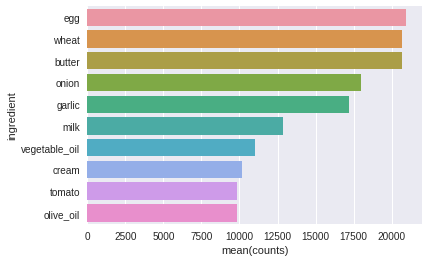

In [88]:
top_10_ingredients = pd.DataFrame((cuisine_process_df == 'Yes').sum().sort_values(ascending=False)[:10].rename_axis('ingredient').reset_index(name='counts'))
sns.barplot(x = 'counts', y = 'ingredient', data = top_10_ingredients)
plt.show()

In [0]:
cuisine_process_df = cuisine_df

In [0]:
cuisine_process_df['country'] = cuisine_process_df['country'].str.upper()

In [5]:
np.sort(cuisine_process_df['country'].unique())

array(['AFRICAN', 'AMERICAN', 'ASIAN', 'AUSTRIA', 'BANGLADESH', 'BELGIUM',
       'CAJUN_CREOLE', 'CANADA', 'CARIBBEAN', 'CENTRAL_SOUTHAMERICAN',
       'CHINA', 'CHINESE', 'EAST-AFRICAN', 'EASTERN-EUROPE',
       'EASTERNEUROPEAN_RUSSIAN', 'EAST_ASIAN', 'ENGLISH_SCOTTISH',
       'FRANCE', 'FRENCH', 'GERMAN', 'GERMANY', 'GREEK', 'INDIA',
       'INDIAN', 'INDONESIA', 'IRAN', 'IRISH', 'ISRAEL', 'ITALIAN',
       'ITALY', 'JAPAN', 'JAPANESE', 'JEWISH', 'KOREA', 'KOREAN',
       'LEBANON', 'MALAYSIA', 'MEDITERRANEAN', 'MEXICAN', 'MEXICO',
       'MIDDLEEASTERN', 'MOROCCAN', 'NETHERLANDS', 'NORTH-AFRICAN',
       'PAKISTAN', 'PHILIPPINES', 'PORTUGAL', 'SCANDINAVIA',
       'SCANDINAVIAN', 'SOUTH-AFRICAN', 'SOUTH-AMERICA',
       'SOUTHERN_SOULFOOD', 'SOUTHWESTERN', 'SPAIN', 'SPANISH_PORTUGUESE',
       'SWITZERLAND', 'THAI', 'THAILAND', 'TURKEY', 'UK-AND-IRELAND',
       'VIETNAM', 'VIETNAMESE', 'WEST-AFRICAN', 'WESTERN'], dtype=object)

In [0]:
cuisine_process_df.replace(to_replace='CHINA', value='CHINESE', inplace=True)
cuisine_process_df.replace(to_replace='FRANCE', value='FRENCH', inplace=True)
cuisine_process_df.replace(to_replace='GERMANY', value='GERMAN', inplace=True)
cuisine_process_df.replace(to_replace='INDIA', value='INDIAN', inplace=True)
cuisine_process_df.replace(to_replace='ITALY', value='ITALIAN', inplace=True)
cuisine_process_df.replace(to_replace='JAPAN', value='JAPANESE', inplace=True)
cuisine_process_df.replace(to_replace='KOREA', value='KOREAN', inplace=True)
cuisine_process_df.replace(to_replace='MEXICO', value='MEXICAN', inplace=True)
cuisine_process_df.replace(to_replace='THAILAND', value='THAI', inplace=True)
cuisine_process_df.replace(to_replace='SCANDINAVIA', value='SCANDINAVIAN', inplace=True)

In [7]:
value_count = cuisine_process_df.stack().value_counts()
removed = value_count[value_count < 75].index
cuisine_process_df = cuisine_process_df.loc[~cuisine_process_df['country'].isin(removed)]
print('No of observations: %d \nNo of features: %s' % (cuisine_process_df.shape[0], cuisine_process_df.shape[1]))

No of observations: 57189 
No of features: 384


In [126]:
cuisine_process_df['count'] = (cuisine_process_df.iloc[:,1:] == 'Yes').sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


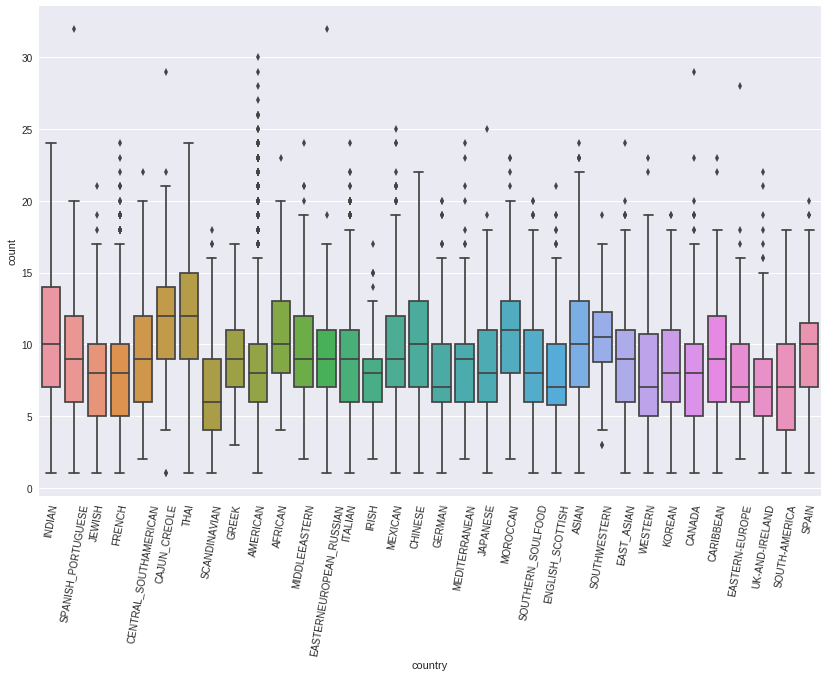

In [127]:
plt.figure(figsize= (14,9))
ax = sns.boxplot(x="country", y="count", data=cuisine_process_df)
plt.xticks(rotation=80)
plt.show()

In [128]:
cuisine_process_df[(cuisine_process_df.rice == 'Yes') & (cuisine_process_df.turmeric ==  'Yes') & (cuisine_process_df.cumin == 'Yes')].head(10)

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini,count
65,INDIAN,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,16
81,INDIAN,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,Yes,13
85,INDIAN,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,18
99,INDIAN,No,No,No,No,No,No,Yes,No,No,...,No,No,No,No,No,No,No,No,No,14
105,INDIAN,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,14
121,INDIAN,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,18
131,INDIAN,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,11
133,INDIAN,No,No,No,Yes,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,15
135,INDIAN,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,13
154,INDIAN,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,18


In [59]:
by_country_df = (cuisine_process_df == 'Yes').groupby(cuisine_process_df['country']).mean()
by_country_df.head(10)

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
country,,,,,,,,,,,,,,,,,,,,,
AFRICAN,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AMERICAN,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ASIAN,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CAJUN_CREOLE,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CANADA,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CARIBBEAN,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CENTRAL_SOUTHAMERICAN,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CHINESE,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
EASTERN-EUROPE,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [130]:
by_country_df.describe()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini,count
count,34.0,34.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0
mean,0.0,0.049709,7.325471e-07,0.006158,0.004129,0.026697,0.000298,0.015129,0.000244,0.000472,...,0.006906,0.049645,0.012211,0.033770,0.000610,0.002333,0.037470,0.026024,0.018620,0.0
std,0.0,0.045920,4.271447e-06,0.013901,0.006085,0.025953,0.001628,0.021698,0.000990,0.001684,...,0.006813,0.035808,0.024589,0.054934,0.001918,0.003991,0.031849,0.052195,0.022862,0.0
min,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003546,0.000000,0.000000,0.000000,0.000000,0.004191,0.000000,0.000000,0.0
25%,0.0,0.010692,0.000000e+00,0.000000,0.000000,0.007735,0.000000,0.002313,0.000000,0.000000,...,0.000418,0.028451,0.000000,0.006729,0.000000,0.000000,0.017610,0.003460,0.000000,0.0
50%,0.0,0.041575,0.000000e+00,0.000419,0.000286,0.019824,0.000000,0.005967,0.000000,0.000000,...,0.005499,0.039510,0.005661,0.011504,0.000000,0.000000,0.025916,0.006981,0.012534,0.0
75%,0.0,0.068570,0.000000e+00,0.007187,0.005020,0.036032,0.000000,0.014618,0.000000,0.000000,...,0.011611,0.059788,0.014764,0.034679,0.000000,0.003014,0.052838,0.018290,0.020696,0.0
max,0.0,0.184000,2.490660e-05,0.076125,0.022222,0.110727,0.009494,0.082192,0.004747,0.007509,...,0.029126,0.126582,0.139535,0.200000,0.009259,0.015625,0.157447,0.235786,0.087591,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


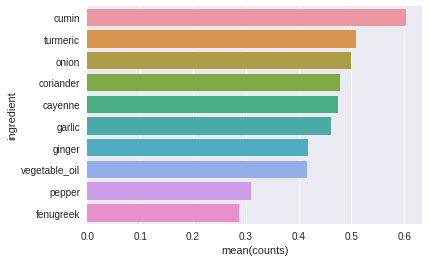

In [137]:
top_indian_ingredients = pd.DataFrame(by_country_df.loc['INDIAN'].sort_values(ascending = False)[:10].rename_axis('ingredient').reset_index(name='counts'))

sns.barplot(x = 'counts', y ='ingredient', data = top_indian_ingredients)
plt.show()                              

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


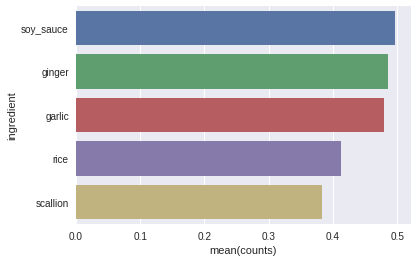

In [157]:
sns.barplot(x = 'counts', y ='ingredient', data = pd.DataFrame(by_country_df.loc['ASIAN'].sort_values(ascending = False)[:5].rename_axis('ingredient').reset_index(name='counts')))
plt.show() 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


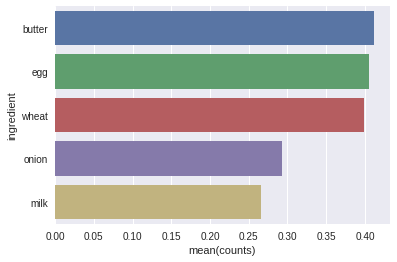

In [158]:
sns.barplot(x = 'counts', y ='ingredient', data = pd.DataFrame(by_country_df.loc['AMERICAN'].sort_values(ascending = False)[:5].rename_axis('ingredient').reset_index(name='counts')))
plt.show() 

#Clustering

In [0]:
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN

no_of_clusters = 3

kmeans = KMeans(n_clusters= no_of_clusters, random_state=123)
kmeans.fit(by_country_df)
y_pred_kmeans = kmeans.predict(by_country_df)


ap = AffinityPropagation(preference = -5.0, damping = 0.95)
ap.fit(by_country_df)
y_pred_ap = ap.predict(by_country_df)

dbscan = DBSCAN(eps = 0.025)
dbscan.fit(by_country_df)
y_pred_dbscan = ap.predict(by_country_df)

In [234]:
print('KMEANS')
for i in range(0, no_of_clusters):
    print('Cluster: '+str(i))
    print(list(by_country_df[y_pred_kmeans == i].index))
    print('\n')
print('-----------------------------------------------\n')
   
print('Affinity Propagation')
for i in range(0, no_of_clusters):
    print('Cluster: '+str(i))
    print(list(by_country_df[y_pred_ap == i].index))
    print('\n')
print('-----------------------------------------------\n')
    
print('DBSCAN')
for i in range(0, no_of_clusters):
    print('Cluster: '+str(i))
    print(list(by_country_df[y_pred_dbscan == i].index))
    print('\n')

KMEANS
Cluster: 0
['ASIAN', 'CHINESE', 'EAST_ASIAN', 'JAPANESE', 'KOREAN', 'THAI']


Cluster: 1
['AMERICAN', 'CANADA', 'EASTERN-EUROPE', 'EASTERNEUROPEAN_RUSSIAN', 'ENGLISH_SCOTTISH', 'FRENCH', 'GERMAN', 'IRISH', 'JEWISH', 'SCANDINAVIAN', 'SOUTHERN_SOULFOOD', 'UK-AND-IRELAND', 'WESTERN']


Cluster: 2
['AFRICAN', 'CAJUN_CREOLE', 'CARIBBEAN', 'CENTRAL_SOUTHAMERICAN', 'GREEK', 'INDIAN', 'ITALIAN', 'MEDITERRANEAN', 'MEXICAN', 'MIDDLEEASTERN', 'MOROCCAN', 'SOUTH-AMERICA', 'SOUTHWESTERN', 'SPAIN', 'SPANISH_PORTUGUESE']


-----------------------------------------------

Affinity Propagation
Cluster: 0
['AMERICAN', 'CANADA', 'EASTERN-EUROPE', 'EASTERNEUROPEAN_RUSSIAN', 'ENGLISH_SCOTTISH', 'FRENCH', 'GERMAN', 'IRISH', 'JEWISH', 'SCANDINAVIAN', 'SOUTH-AMERICA', 'SOUTHERN_SOULFOOD', 'UK-AND-IRELAND', 'WESTERN']


Cluster: 1
['ASIAN', 'CHINESE', 'EAST_ASIAN', 'INDIAN', 'JAPANESE', 'KOREAN', 'THAI']


Cluster: 2
['AFRICAN', 'CAJUN_CREOLE', 'CARIBBEAN', 'CENTRAL_SOUTHAMERICAN', 'GREEK', 'ITALIAN', '

# Cuisine Prediction

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [0]:
cuisine_model_df = cuisine_process_df

In [71]:
cuisine_model_df.replace(to_replace='No', value=0, inplace=True)
cuisine_model_df.replace(to_replace='Yes', value=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [249]:
cuisine_model_df.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
65,INDIAN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,INDIAN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,INDIAN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,INDIAN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,INDIAN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [0]:
y = 'country'
X = cuisine_model_df.iloc[:,1:].columns.values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(cuisine_model_df[X], cuisine_model_df[y], random_state=0)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

In [260]:
seed = 7

models = []
models.append(('DecisionTree', DecisionTreeClassifier(criterion = 'entropy', max_depth=7, min_samples_split=20, min_samples_leaf=100)))
models.append(('RF', RandomForestClassifier(n_estimators = 35, criterion = 'entropy')))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean()*100)
    print(msg)

DecisionTree: 71.255052
RF: 71.369285


In [74]:
rf  = RandomForestClassifier(criterion='entropy', n_estimators = 35)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.71


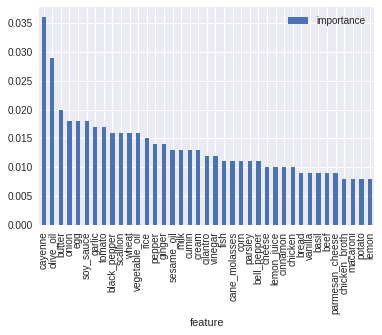

In [312]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances = importances[importances.values > 0.007]

importances.plot.bar()

In [0]:
new_df = cuisine_model_df[cuisine_model_df['country'].isin(['KOREAN', 'CHINESE', 'JAPANESE', 'THAI', 'INDIAN'])]

In [17]:
new_df['country'].value_counts()

KOREAN      799
INDIAN      598
CHINESE     442
JAPANESE    320
THAI        289
Name: country, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(new_df[X], new_df[y], random_state=0)

In [19]:
rf_2  = RandomForestClassifier(criterion='entropy', n_estimators = 35)
rf_2.fit(X_train, y_train)
y_pred = rf_2.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(rf_2.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.79


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

    CHINESE       0.72      0.72      0.73       120
     INDIAN       0.84      0.93      0.88       147
   JAPANESE       0.76      0.62      0.68        80
     KOREAN       0.80      0.88      0.84       190
       THAI       0.85      0.60      0.70        75

avg / total       0.79      0.79      0.79       612



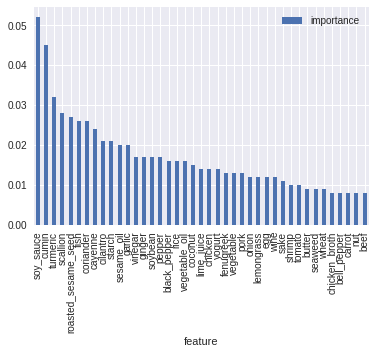

In [29]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf_2.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances = importances[importances.values > 0.007]

importances.plot.bar()

In [49]:
my_recipe = pd.DataFrame(np.random.binomial(1, 0.1, size = (1, cuisine_model_df.shape[1])), index=['my_recipe'])
my_recipe.columns = cuisine_model_df.columns
my_recipe

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
my_recipe,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
my_recipe['turmeric'] = 1
my_recipe['cumin'] = 1
my_recipe['onion'] = 1

In [57]:
x = my_recipe.iloc[:, 1:]
y_pred = rf_2.predict(x)
y_pred[0]

'INDIAN'

## Future Enhancements

1) Remove correlation among the features <br>
2) Try PCA to reduce the dimenionality of the features <br>
3) Try XGBoost or Neural Networks and see if it helps in getting a better model